Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100% 8.54k/8.54k [00:00<00:00, 18.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100% 4.25k/4.25k [00:00<00:00, 13.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100% 54.7k/54.7k [00:00<00:00, 66.7MB/s]
Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

 None

        CustomerID      CustomerName         Region  SignupDate
count         200               200            200  

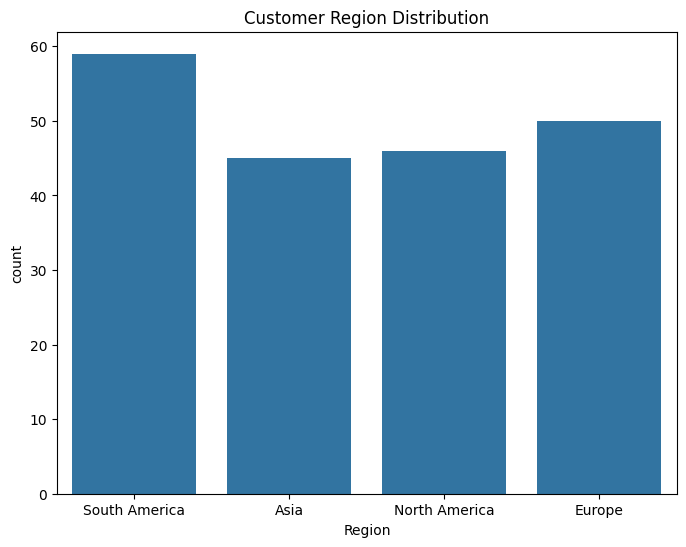

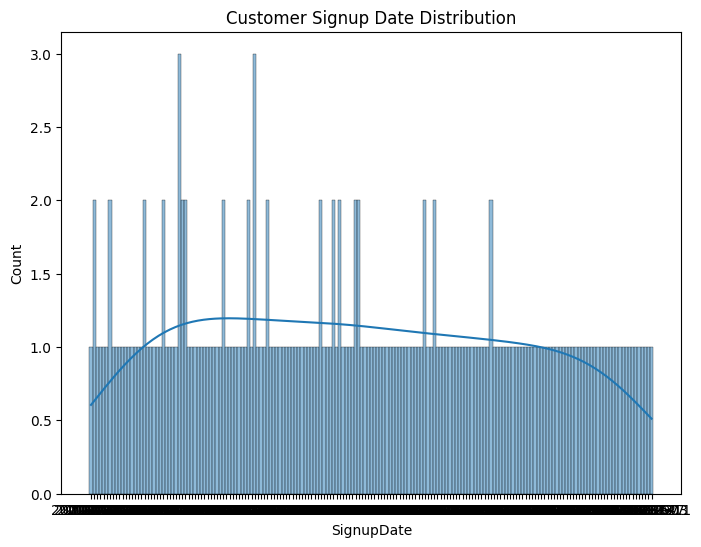


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

 None

             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


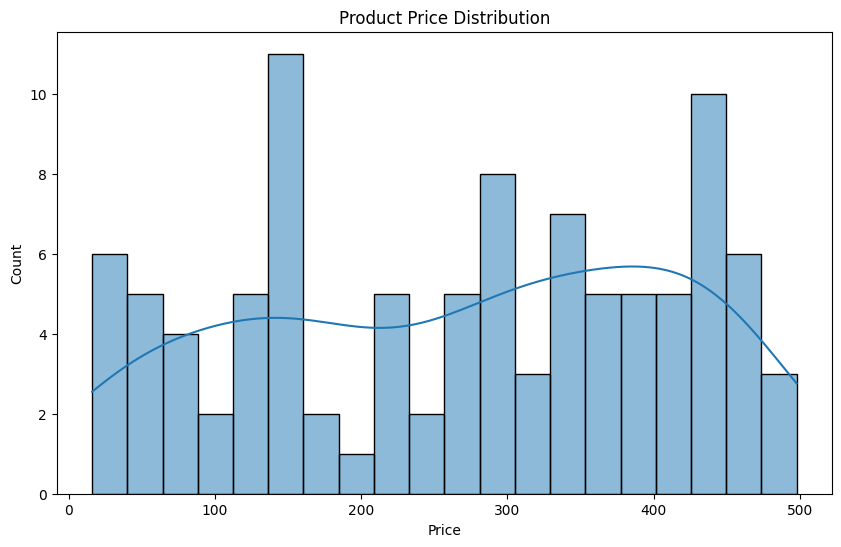

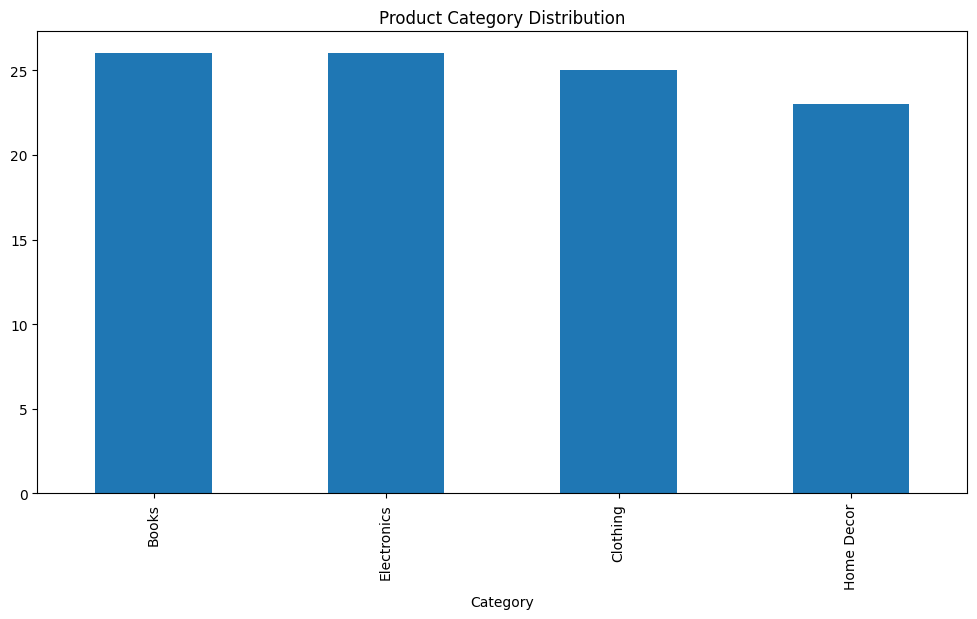


Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB

 None

           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497

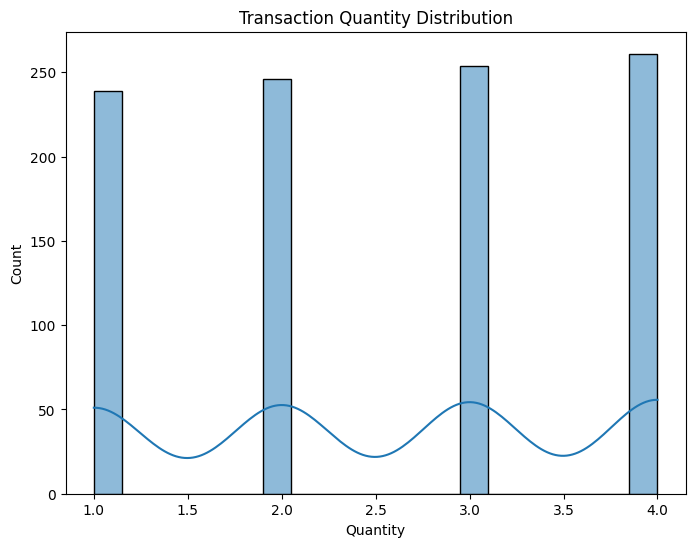

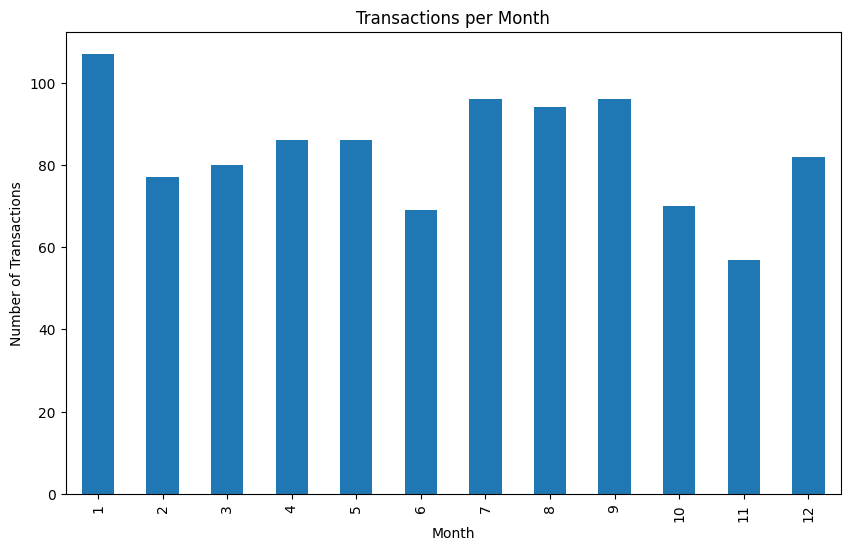

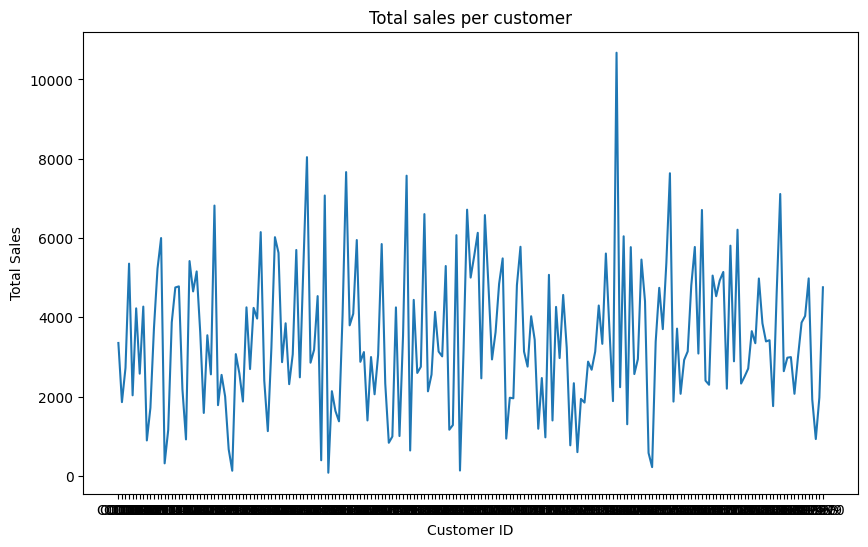

In [2]:
!gdown "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
!gdown "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
!gdown "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# --- Customers EDA ---
print("Customers Data:")
print("\n", customers.info())
print("\n", customers.describe())
print("\n", customers.head())

# Visualizations for Customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=customers)
plt.title('Customer Region Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(customers['SignupDate'], bins=20, kde=True)
plt.title('Customer Signup Date Distribution')
plt.show()

# --- Products EDA ---
print("\nProducts Data:")
print("\n", products.info())
print("\n", products.describe())
print("\n", products.head())

# Visualizations for Products
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Product Price Distribution')
plt.show()

plt.figure(figsize=(12, 6))
products['Category'].value_counts().plot(kind='bar')
plt.title('Product Category Distribution')
plt.show()


# --- Transactions EDA ---
print("\nTransactions Data:")
print("\n", transactions.info())
print("\n", transactions.describe())
print("\n", transactions.head())

# Visualizations for Transactions
plt.figure(figsize=(8, 6))
sns.histplot(transactions['Quantity'], bins=20, kde=True)
plt.title('Transaction Quantity Distribution')
plt.show()

# Analyze transaction date (if it exists and is formatted correctly)
# Example: If 'TransactionDate' column exists
if 'TransactionDate' in transactions.columns:
  transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate']) #convert column to datetime format
  transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month
  plt.figure(figsize=(10, 6))
  transactions['TransactionMonth'].value_counts().sort_index().plot(kind='bar')
  plt.title('Transactions per Month')
  plt.xlabel('Month')
  plt.ylabel('Number of Transactions')
  plt.show()


# --- Relationships between datasets ---
# Example: Analyze total sales per customer
merged_df = pd.merge(transactions, products, on='ProductID', how='left')
customer_sales = merged_df.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(customer_sales.index, customer_sales.values)
plt.title('Total sales per customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()